In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Membaca data**

In [3]:
data = pd.read_csv('data_bike_sharing.csv')

**Kualitas Data**

In [12]:
missing_data = data.isnull().sum()
print("Kehilangan Data:\n", missing_data)
invalid_temp = data[(data['temp'] < -10) | (data['temp'] > 50)]
print("Kesalahan Input (Suhu tidak masuk akal):\n", invalid_temp)

Kehilangan Data:
 dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
dtype: int64
Kesalahan Input (Suhu tidak masuk akal):
 Empty DataFrame
Columns: [dteday, hum, weathersit, holiday, season, atemp, temp, hr, casual, registered, cnt, year, month, day]
Index: []


**Normalisasi Data**

In [5]:
print("Skala Data:\n", data.describe())

Skala Data:
                 hum    weathersit       holiday        season         atemp  \
count  12165.000000  12165.000000  12165.000000  12165.000000  12165.000000   
mean       0.625451      1.416934      0.029758      2.488615      0.476996   
std        0.192102      0.635937      0.169925      1.106157      0.171857   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%        0.470000      1.000000      0.000000      2.000000      0.333300   
50%        0.620000      1.000000      0.000000      2.000000      0.484800   
75%        0.780000      2.000000      0.000000      3.000000      0.621200   
max        1.000000      4.000000      1.000000      4.000000      1.000000   

               temp            hr        casual    registered           cnt  
count  12165.000000  12165.000000  12165.000000  12165.000000  12165.000000  
mean       0.498185     11.519770     35.834443    153.436580    189.271023  
std        0.192492      6.931872     49.

**Korelasi antar variabel**

Text(0.5, 1.0, 'Matriks Korelasi Data Bike Sharing')

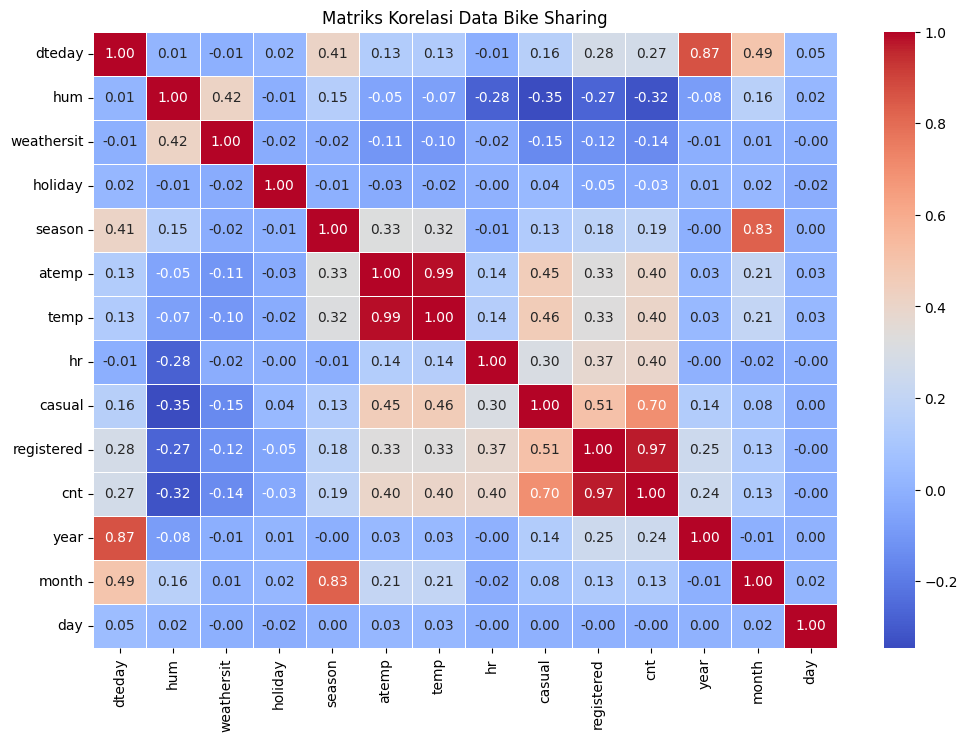

In [13]:
data['dteday'] = pd.to_datetime(data['dteday'])
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day'] = data['dteday'].dt.day

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi Data Bike Sharing')

**Pengaruh musim dan cuaca terhadap penyewaan sepeda**

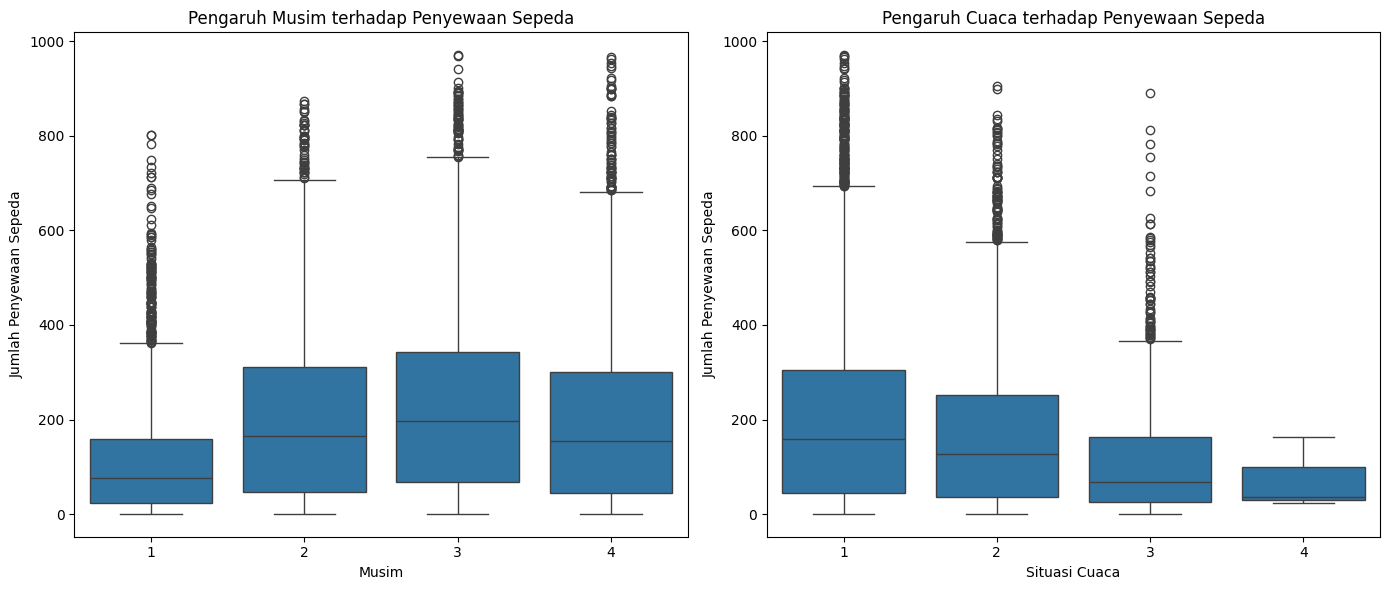

In [14]:
data['season'] = data['season'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.tight_layout()
plt.show()

**Analisis distribusi penyewaan berdasarkan jam dan hari**

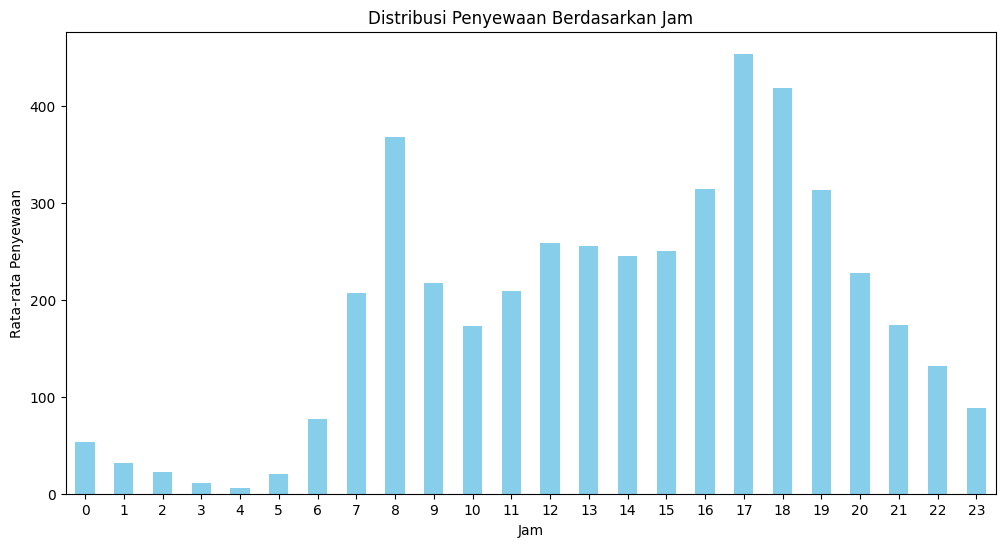

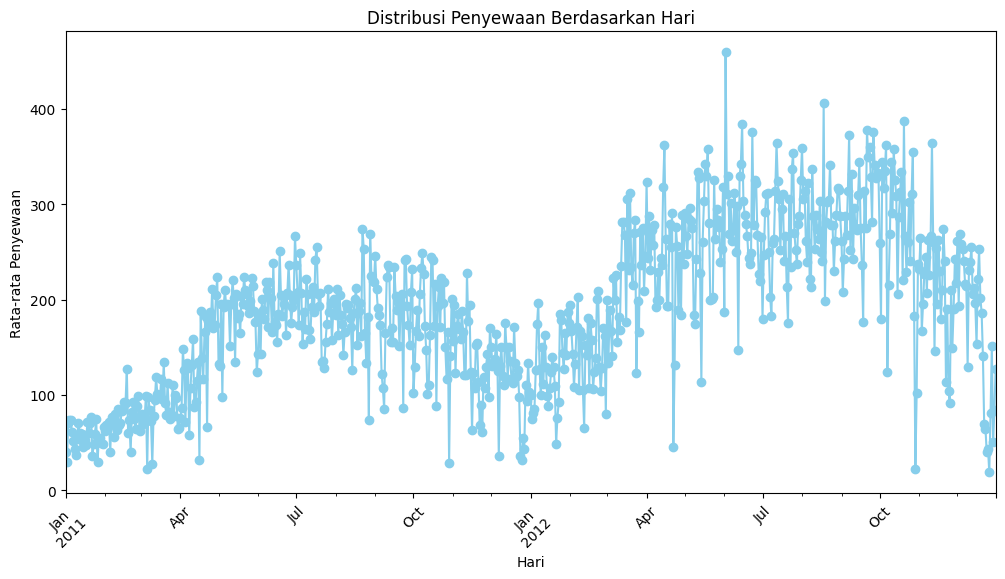

In [16]:
plt.figure(figsize=(12, 6))
hourly_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Penyewaan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
daily_distribution.plot(kind='line', marker='o', color='skyblue')
plt.title('Distribusi Penyewaan Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.show()

**Mengidentifikasi outliers menggunakan IQR**

Lower Bound: -323.0
Upper Bound: 645.0
Number of Outliers: 338


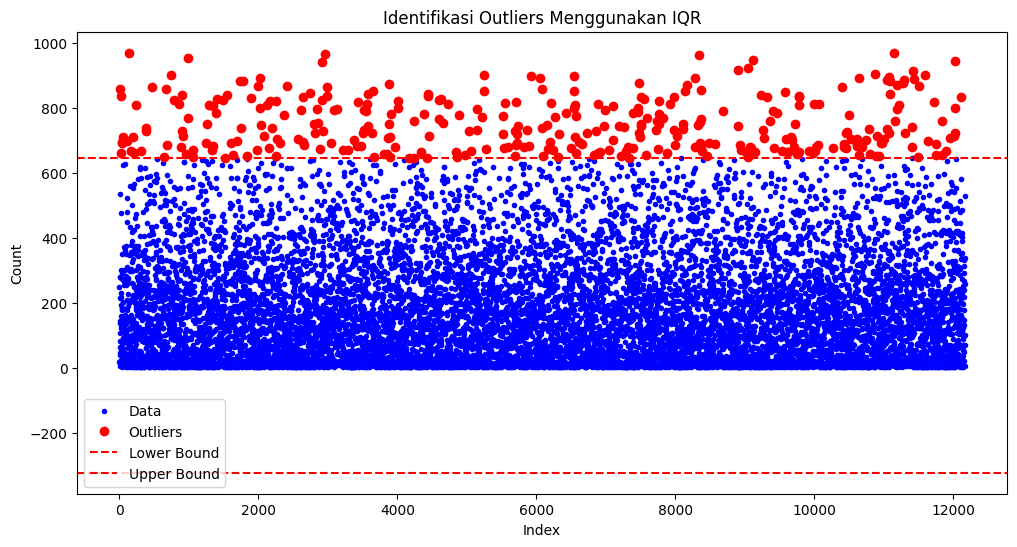

In [11]:
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['cnt'] < lower_bound) | (data['cnt'] > upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")

plt.figure(figsize=(12, 6))
plt.plot(data['cnt'], 'b.', label='Data')
plt.plot(outliers.index, outliers['cnt'], 'ro', label='Outliers')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.title('Identifikasi Outliers Menggunakan IQR')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()

**Pengaruh Hari Libur**

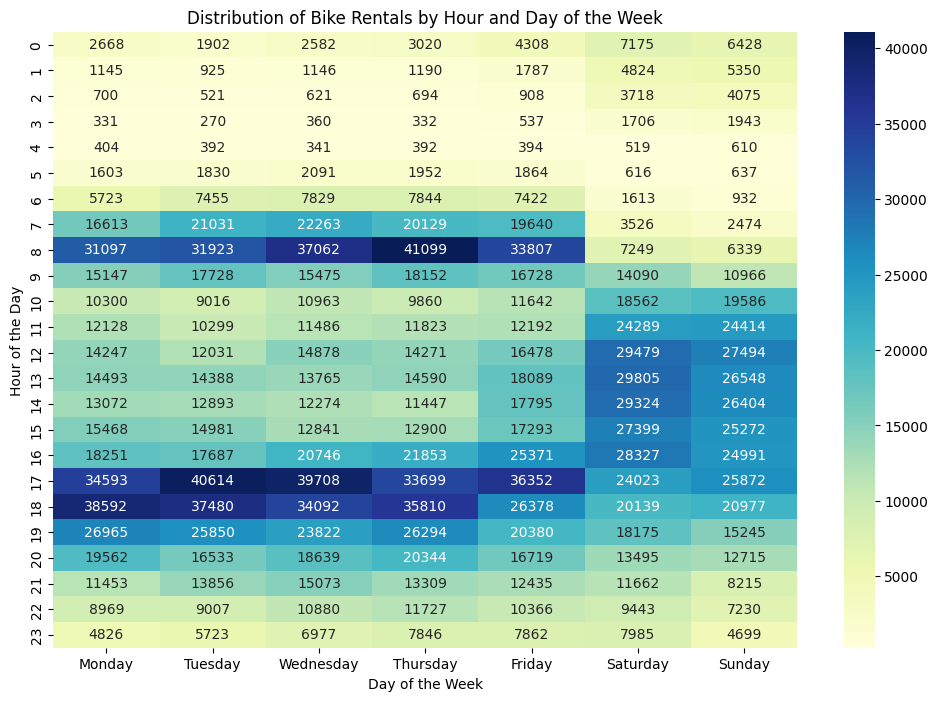

In [17]:
data['day_of_week'] = data['dteday'].dt.day_name()
data['hour'] = data['hr']

# Set the order of days for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for the count of rentals by hour and day of the week
pivot_table = data.pivot_table(values='cnt', index='hour', columns='day_of_week', aggfunc='sum')

# Reorder the columns to match the order of days
pivot_table = pivot_table[days_order]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Distribution of Bike Rentals by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()